kc_house_data.csv came from here: https://www.kaggle.com/harlfoxem/housesalesprediction

In [1]:
import pandas as pd
import numpy as np

source = pd.read_csv("kc_house_data.csv")
source.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


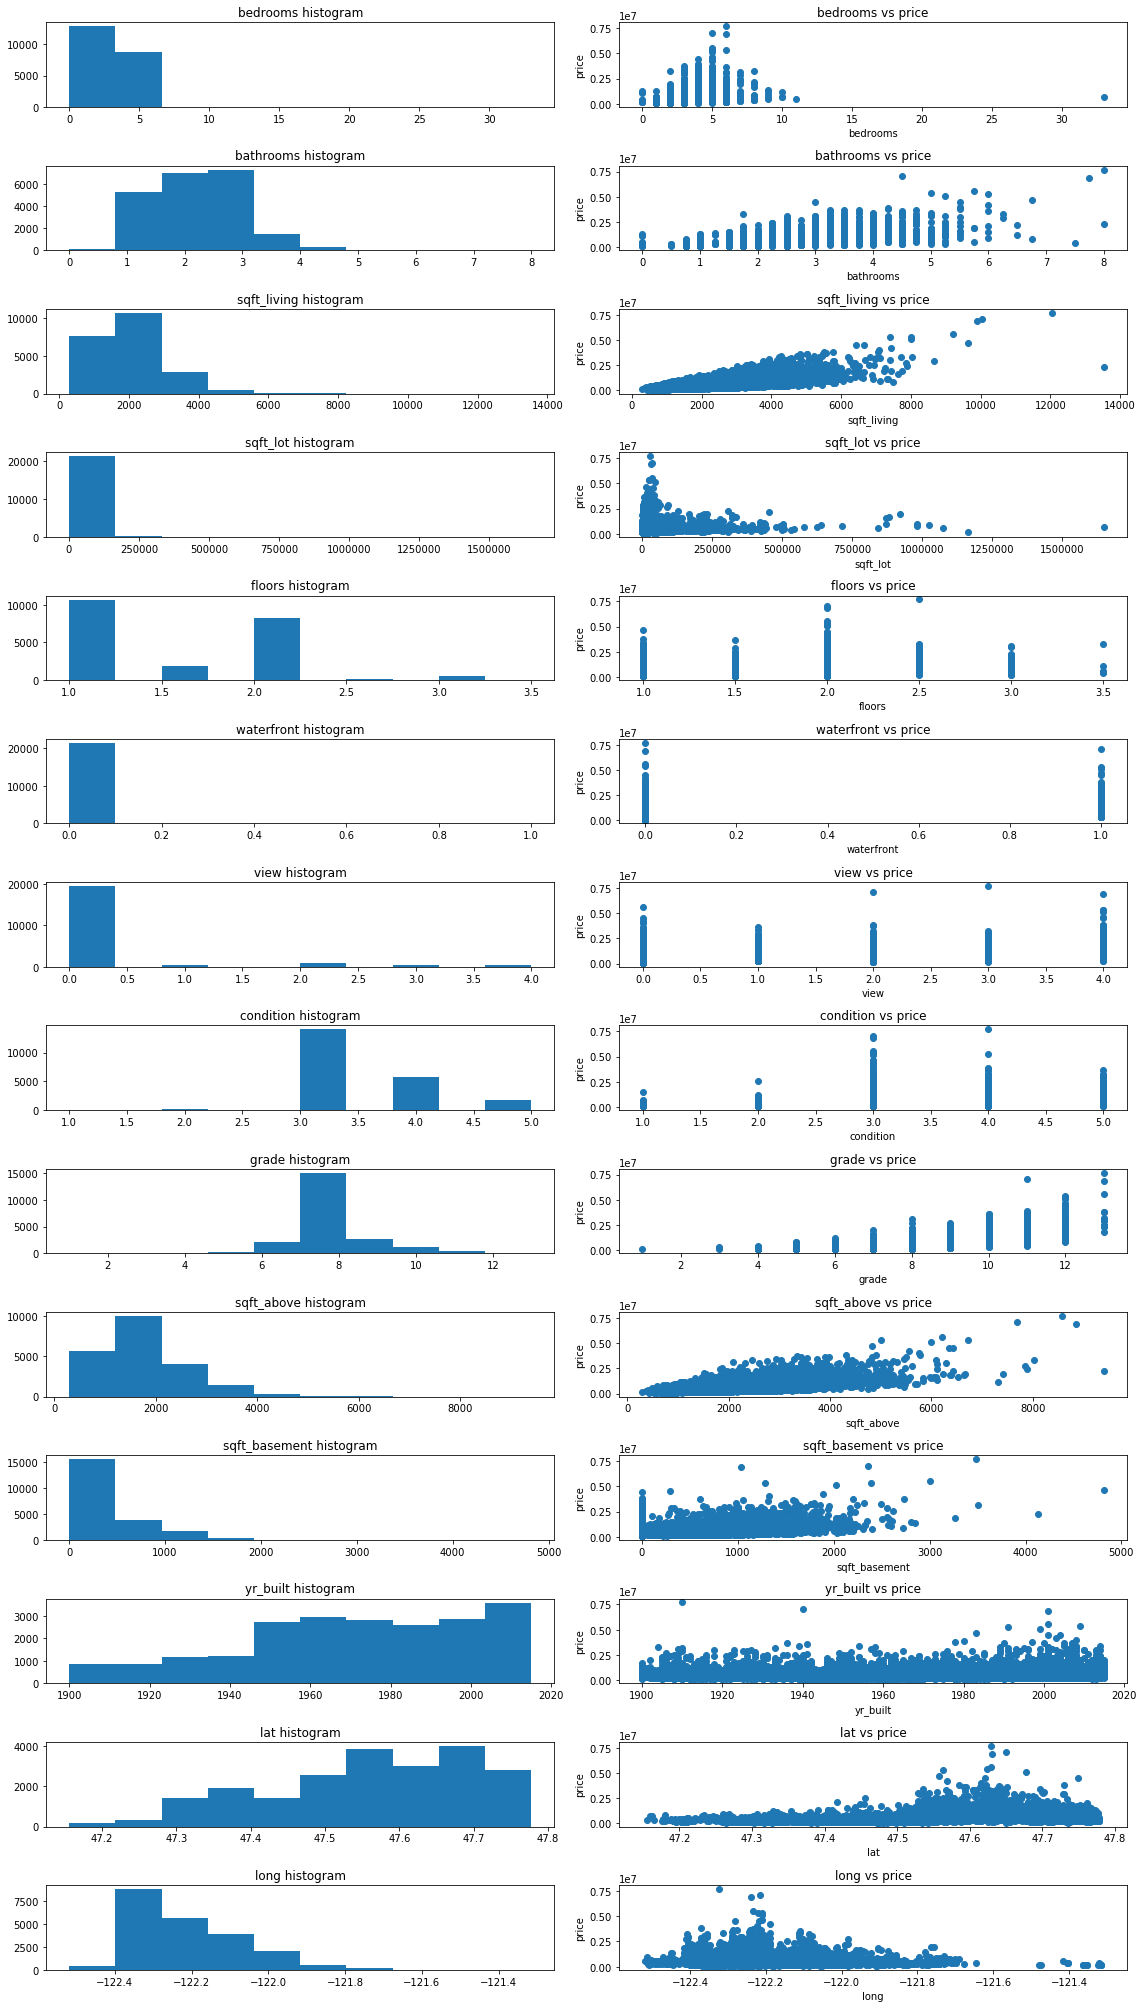

In [2]:
import matplotlib.pyplot as plt

columns = [
    "bedrooms",
    "bathrooms",
    "sqft_living",
    "sqft_lot",
    "floors",
    "waterfront",
    "view",
    "condition",
    "grade",
    "sqft_above",
    "sqft_basement",
    "yr_built",
    "lat",
    "long"
]
fig, axes = plt.subplots(len(columns), 2, figsize=[16, len(columns)*2])
for i, column in enumerate(columns):
    histogram = axes[i, 0]
    histogram.set_title(column + " histogram")
    histogram.hist(source[column], 10)
    scatter = axes[i, 1]
    scatter.set_title(column + " vs price")
    scatter.scatter(source[column], source.price)
    scatter.set_xlabel(column)
    scatter.set_ylabel("price")
    
plt.tight_layout()
plt.show()

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
import math
import time

# Model #1
if True:
    X = source[[
        "sqft_living", 
        "view", 
        "condition", 
        "grade", 
        "floors", 
        "bedrooms", 
        "bathrooms", 
        "lat", 
        "long", 
        "yr_built"
    ]]
    y = source["price"]
    
    reg = LinearRegression()
    scores = cross_val_score(reg, X, y, cv=4)
    print("Model #1 mean score", scores.mean())

Model #1 mean score 0.673478687499


In [4]:
# Model #2
if True:
    X = source[[
        "sqft_living",
        "view",
        "grade",
        "lat",
        "yr_built"
    ]]
    y = list(source.apply(lambda row: math.log(row.price), axis=1).values)

    reg = LinearRegression()
    scores = cross_val_score(reg, X, y, cv=4)
    print("Model #2 mean score", scores.mean())

Model #2 mean score 0.742995178854
